# Project: Investigate a Dataset - tmdb movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset description
This dataset contains information about over 10,000 movies from The Movie Database (TMDb). The dataset has the following columns:

* id - movie id
* imdb_id - imdb's id for the movie
* popularity - How popular the movie is 
* budget - How much money spent on the movie
* revenue - How much money the movie made
* original title - Original title of the movie
* cast - Cast members in the movie
* homepage - Website address to the movies homepage
* director - Director of the movie
* tagline - Tagline of the movie
* keywords - Keywords about the movie
* overview - Overview of what the movie is about 
* runtime - Runtime of the movie
* genres - What genres the movie falls under
* production_company - Who produced the movie
* release_date - When the movie was released
* vote_count - How many people voted on how good the movie was
* vote_average - Average score of voters on how good the movie was
* release_year - Year the movie was released
* budget_adj - Budget adjusted for inflation
* revenue_adj - Revenue adjusted for inflation

## Questions

### Question 1
> What genres are most popular year over year?

### Question 2
> What kinds of properties are associated with movies that have high revenue?



In [48]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


In [49]:
#Load data and print out first few rows
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [50]:
#Get info about data
print(df.shape)
df.info()

(10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release

In [51]:
#Find unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [52]:
#Investigate statistics of data.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [53]:
#Find number of na in data
pd.isna(df).sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Initial Thoughts

* Split up all the | 
* Release date is not in datetime format
* I can drop homepage, tagline, imdb_id, overview - lots of nulls and not important to analysis of questions. imdb_id can be dropped because there is another id column with no nulls.



### Data Cleaning

In [54]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['homepage', 'tagline', 'imdb_id', 'overview'], axis=1, inplace=True)
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Dropped columns
I dropped the following 4 columns: homepage, tagline, imdb_id, and overview. Homepage was dropped because it is not relevant to analysis and had nulls. Tagline and overview were dropped for the same reasons. imdb_id was dropped because there is another column for id that has no nulls, while imdb_id had nulls.

In [55]:
df.dropna(inplace=True)

### Dropped nulls

I dropped rows with null values

In [56]:
print(df.dtypes)
print(np.iinfo("int8"))
print(np.iinfo("int16"))
print(np.iinfo("int32"))
print(np.finfo("float16"))

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object
Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
----------------------------------------------------

### Looking at data types

I am looking at data types of all the parameters and checking the min and max values of different int and float types

In [57]:
df["popularity"] = df["popularity"].astype("float16")
df["id"] = df["id"].astype("int32")
df["budget"] = df["budget"].astype("int32")
df["runtime"] = df["runtime"].astype("int16")
df["vote_count"] = df["vote_count"].astype("int16")
df["vote_average"] = df["vote_average"].astype("float16")
df["release_year"] = df["release_year"].astype("int16")
df["budget_adj"] = df["budget_adj"].astype("int32")
df["revenue_adj"] = df["revenue_adj"].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8667 non-null   int32  
 1   popularity            8667 non-null   float16
 2   budget                8667 non-null   int32  
 3   revenue               8667 non-null   int64  
 4   original_title        8667 non-null   object 
 5   cast                  8667 non-null   object 
 6   director              8667 non-null   object 
 7   keywords              8667 non-null   object 
 8   runtime               8667 non-null   int16  
 9   genres                8667 non-null   object 
 10  production_companies  8667 non-null   object 
 11  release_date          8667 non-null   object 
 12  vote_count            8667 non-null   int16  
 13  vote_average          8667 non-null   float16
 14  release_year          8667 non-null   int16  
 15  budget_adj          

### Changing types to save memory usage

I am decreasing the int and float types in order to save memory. 

In [58]:
df["release_date"] = pd.to_datetime(df["release_date"])

### Changing type

I changed release date to datetime format

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8667 non-null   int32         
 1   popularity            8667 non-null   float16       
 2   budget                8667 non-null   int32         
 3   revenue               8667 non-null   int64         
 4   original_title        8667 non-null   object        
 5   cast                  8667 non-null   object        
 6   director              8667 non-null   object        
 7   keywords              8667 non-null   object        
 8   runtime               8667 non-null   int16         
 9   genres                8667 non-null   object        
 10  production_companies  8667 non-null   object        
 11  release_date          8667 non-null   datetime64[ns]
 12  vote_count            8667 non-null   int16         
 13  vote_average     

### Check

I checked to make sure all sizes were the same, datatypes were correct, and memory was saved

In [60]:
#Columns to be split by "|"
split_columns = ['cast', 'keywords', 'genres', 'production_companies']

#Apply split function to each column in dataframe
for c in split_columns:
    df[c] = df[c].apply(lambda x: x.split("|"))

### Split the columns that have | in them

I split all the columns that have multiple values in them with | in between, making them easier to work with later. 

In [61]:
df_cast = df.explode('cast')
df_genres = df.explode('genres')
df_production_companies = df.explode('production_companies')
df_keywords = df.explode('keywords')

### Create new dataframes

I created new dataframes. There were four columns that I had to split up, and I exploded each one into different dataframes to use later. 

In [62]:
years = np.arange(df.release_year.min(), df.release_year.max())
genres_df = pd.DataFrame()
for year in years:
    df_genres_queried = df_genres.query('release_year == {}'.format(year))
    genres_df['{}'.format(year)] = df_genres_queried.value_counts('genres')
print(genres_df.head())
genres_df = genres_df.fillna(method='ffill', axis=1)

          1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...  \
genres                                                                ...   
Drama       12  16.0    19  13.0    20  18.0  15.0  15.0    19  12.0  ...   
Action       7   7.0     6   4.0     5   9.0  14.0   5.0     6  10.0  ...   
Comedy       7   8.0     5  13.0    16   7.0  15.0  15.0     8   8.0  ...   
Horror       7   3.0     5   8.0     6   4.0   3.0   4.0     4   NaN  ...   
Thriller     6   NaN     7  10.0     9  10.0   8.0   4.0     5   3.0  ...   

          2005  2006  2007   2008   2009  2010  2011  2012  2013  2014  
genres                                                                  
Drama      151   166   163  183.0  179.0   162   162   155   189   226  
Action      66    64    78   78.0   84.0    83    85    85    91   101  
Comedy     113   128   116  126.0  156.0   120   127   121   112   130  
Horror      55    46    70   57.0   71.0    53    55    71    72    81  
Thriller    87    95  

I created a years variable that goes from the min to max year. I created a new dataframe to add to in the following loop. I then iterated through the years, getting the count for number of movies in each year and adding it to the dataframe I then filled the NaN's with the value from the previous year

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 ( What genres are most popular year over year?)

This is an important question to answer so you know what is trending in movies year over year. If you know that vertain categories are increasing year over year, you can better predict the popularity of future movies made. 

Text(0.5, 0.98, 'Scatter Matrix Plot')

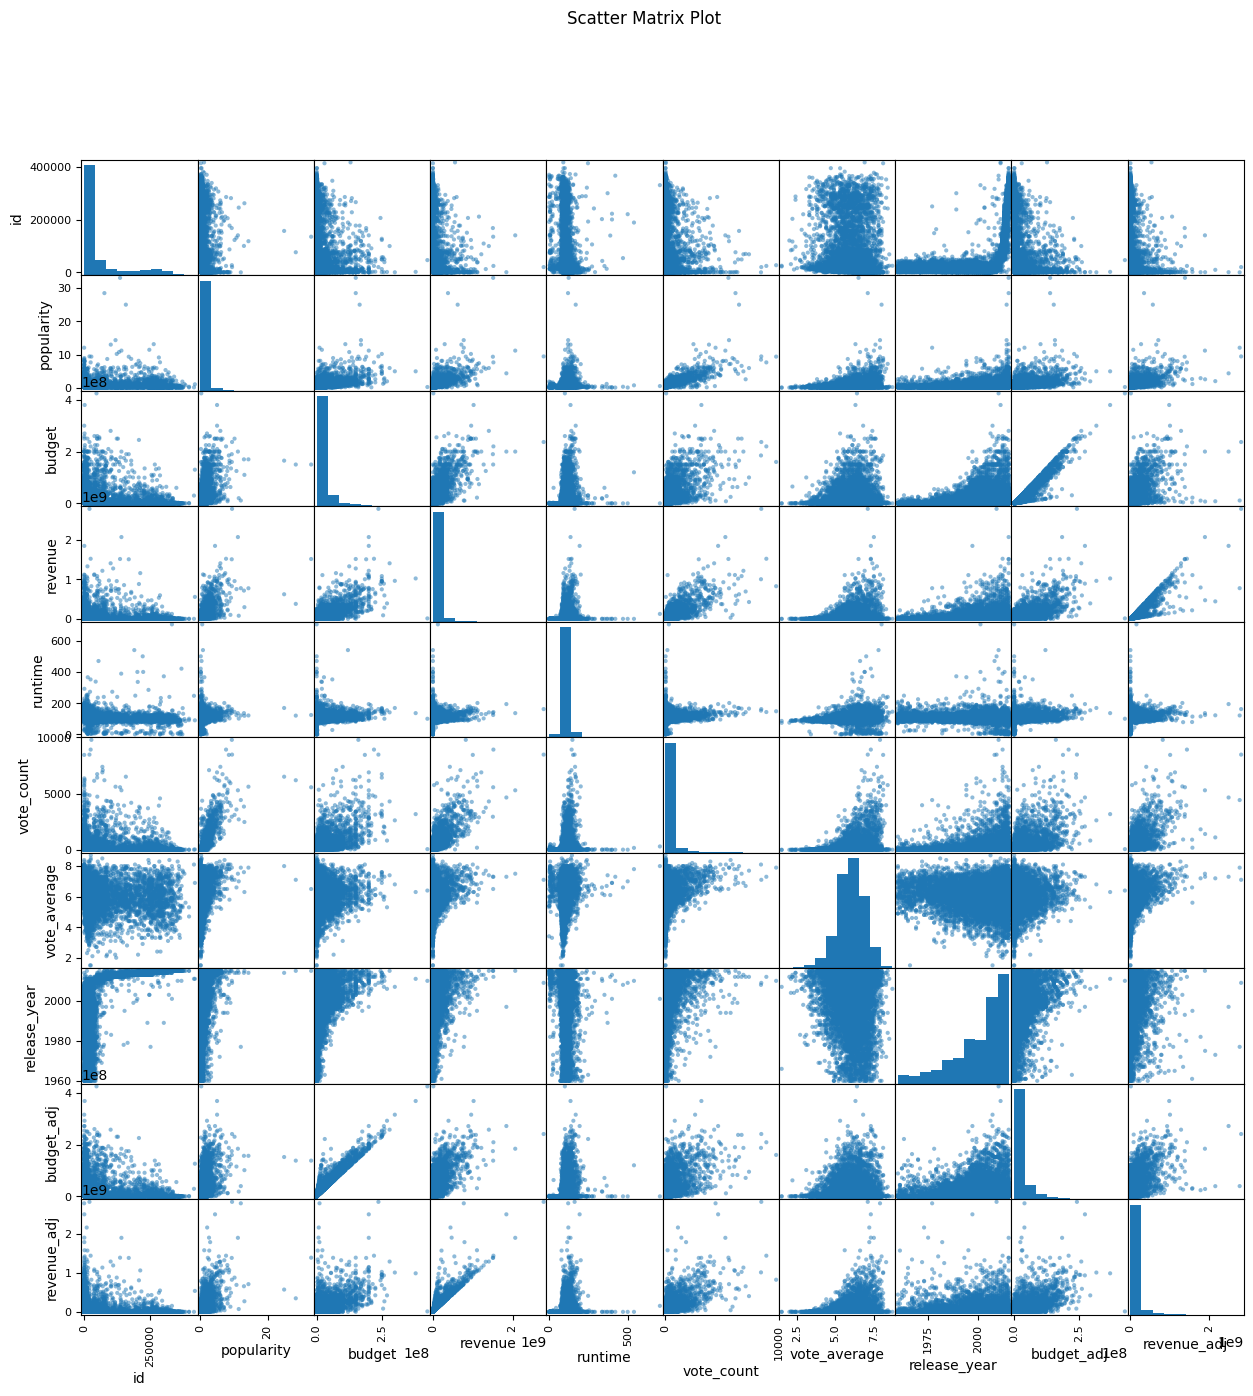

In [63]:
import matplotlib.pyplot as plt
# Create a scatter matrix to see different relationships
pd.plotting.scatter_matrix(df, figsize=(15,15));
plt.suptitle('Scatter Matrix Plot')

This scatter matrix shows scatter plots of each variable against eachother to see where overall trends are in the data. I did this first to see where I should dig deeper in the data.

Text(0.5, 1.0, 'Number of movies per year by genre')

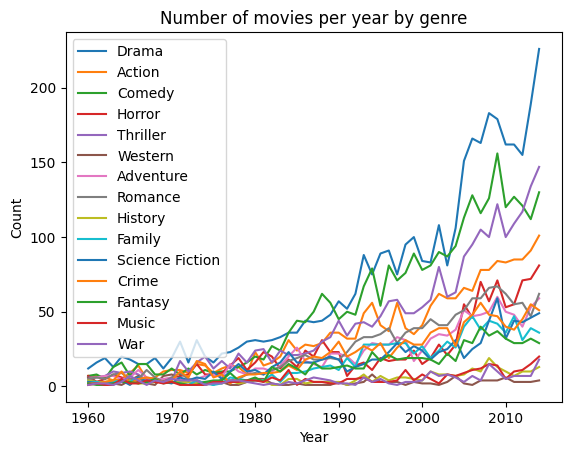

In [64]:
#import matplotlib.pyplot to plot number of genres by year with a legend
import matplotlib.pyplot as plt

#Create a rows variable that to iterate through each row
rows = np.arange(0, genres_df.shape[0])

#Iterate through each row to plot each genre throughout the years
for i in rows:
    genres_df.iloc[i].plot()
    plt.legend()
    
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of movies per year by genre')

This plot shows the number of movies made each year for each movie genre, helping me understand how this changes througout the years.

In [65]:
genres_df['2014']-genres_df['2013']

genres
Drama              37.0
Action             10.0
Comedy             18.0
Horror              9.0
Thriller           13.0
Western             1.0
Adventure           6.0
Romance            15.0
History             3.0
Family             -3.0
Science Fiction     3.0
Crime              -4.0
Fantasy            -3.0
Music               5.0
War                11.0
dtype: float64

This shows the increase in the number of movies year over year for each genre. Here you can see which movies have increased the most over the past year

### Research Question 2  (What kinds of properties are associated with movies that have high revenue?)

This is an important question to answer so that you know what contributes to having a high revenue movie. If you make a movie, knowing these properties could help you make a lot more revenue.

/tmp/ipykernel_9/1999278618.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


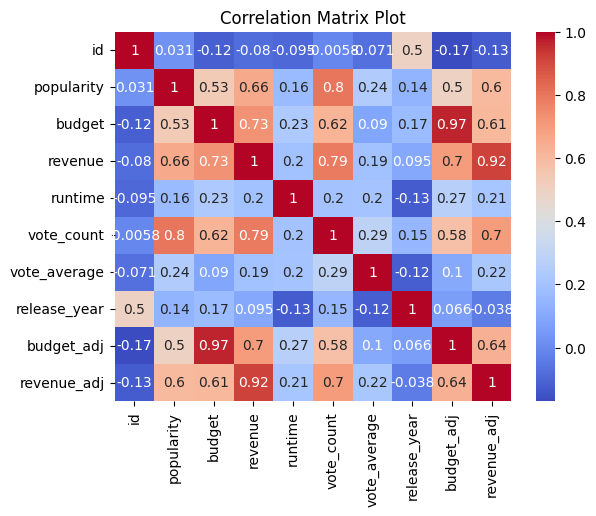

In [66]:
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Plot')
plt.show()

I created a correlation matrix of each variable against one another. The closer to 1, the more linear relationship there is between variables. I did this to get a broad overview of the different correlations in the data so I could focus on some to dig deeper on. This is also only a linear relationship, so it is not all encompassing

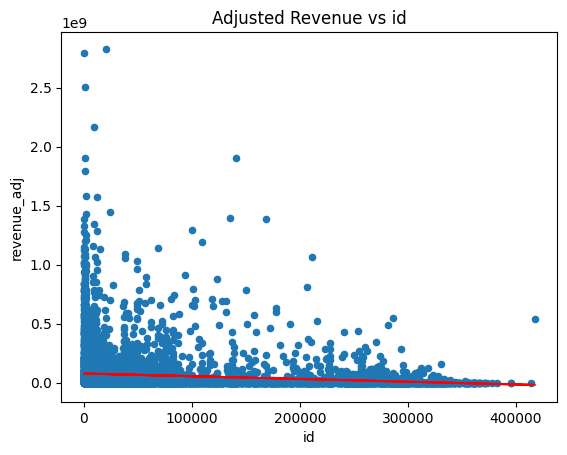

In [67]:
#This function makes it simpler to plot against adjusted revenue
def plot_revenue(x):
    '''Takes in a variable x, which is the parameter you want to plot against revenue_adj
    Outputs a plot of your inputted variable against revenue_adj'''
    
    return df.plot(x, y='revenue_adj', title='Adjusted Revenue vs '+x, kind='scatter');

def best_fit_revenue(par):
    '''Takes in a variable par, which is the parameter you want the best fit line of against revenue_adj
    Outputs line of best fit'''
    
    x_var = df[par]
    y_var = df['revenue_adj']
    slope, intercept = np.polyfit(x_var, y_var, 1)
    
    return plt.plot(x_var, slope*x_var + intercept, color='red')

#Plot revenue vs id and the line of best fit
plot_revenue('id');
best_fit_revenue('id')

This scatter plot shows the relationship between id and adjusted revenue. There is a very slight negative correlation here, but is pretty insignificant

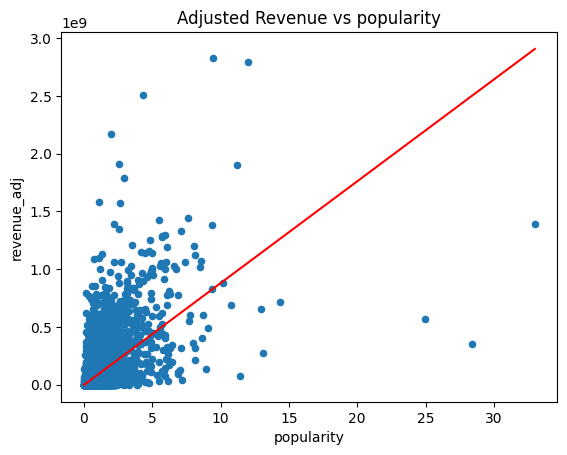

In [68]:
#Plot revenue vs popularity and the line of best fit
plot_revenue('popularity');
best_fit_revenue('popularity');

This scatter plot shows the relationship between popularity and adjusted revenue. There is a strong positive correlation here, meaning that the more popular a movieis, the more revenue it gets.

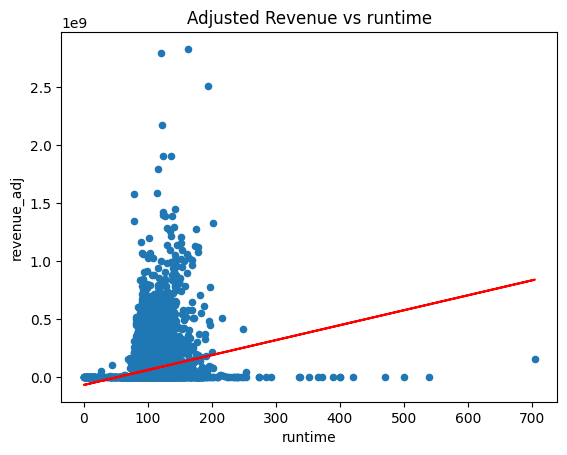

In [69]:
#Plot revenue vs runtime and the line of best fit
plot_revenue('runtime');
best_fit_revenue('runtime')

This scatter plot shows the relationship between runtime and adjusted revenue. There is a positive correlation here, but the data is very concentrated on a certain range, so this is not the best indication that a longer runtime means higher revenue. 

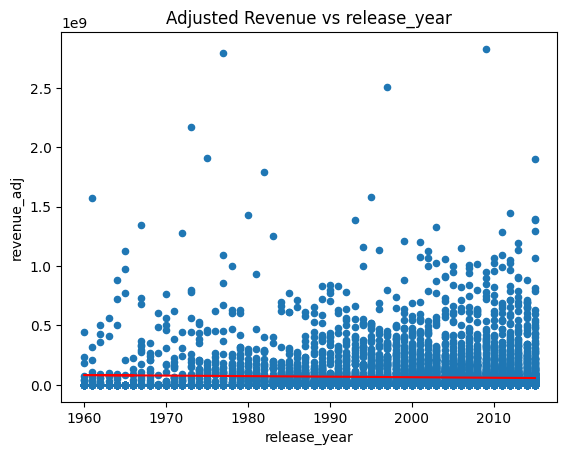

In [70]:
#Plot revenue vs release year and the line of best fit
plot_revenue('release_year');
best_fit_revenue('release_year')

This scatter plot shows the relationship between release year and adjusted revenue. There is a  very slight negative correlation here, but release year seems to have little to no effect on revenue.

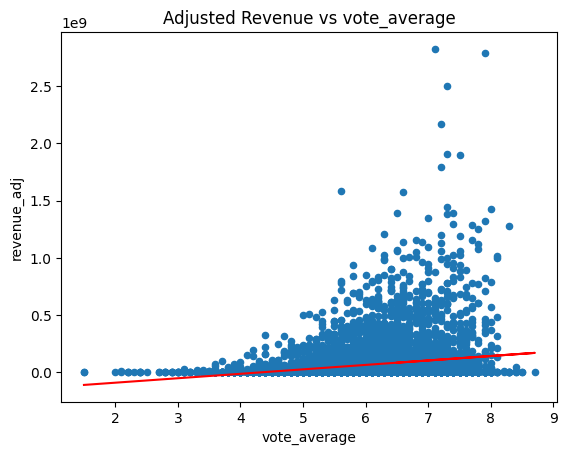

In [71]:
#Plot revenue vs vote_avg and the line of best fit
plot_revenue('vote_average');
best_fit_revenue('vote_average');

This scatter plot shows the relationship between vote average and adjusted revenue. It looks like there is a slightly positive correlation between the two, but it is not very significant

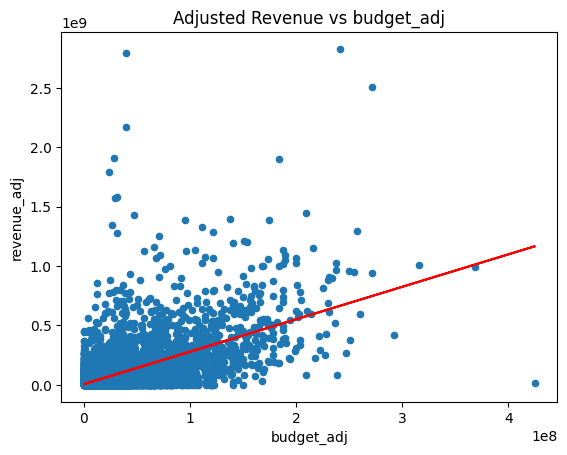

In [72]:
#Plot revenue vs adjusted budget and the line of best fit
plot_revenue('budget_adj');
best_fit_revenue('budget_adj')

This scatter plot shows the relationship between adjusted budget and adjusted revenue. There is a clear positive correlation here, meaning that the higher the budget, the higher the revenue. 

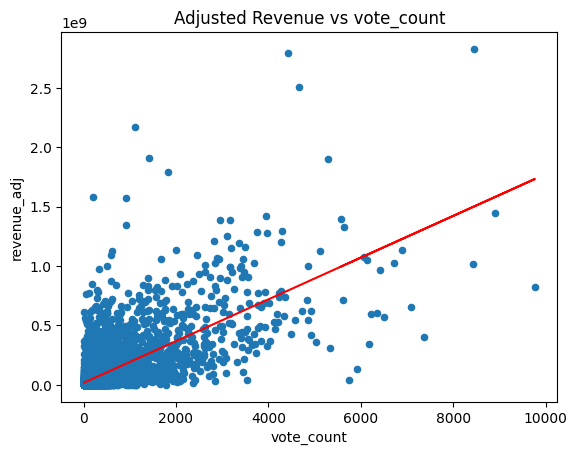

In [73]:
#Plot revenue vs adjusted budget and the line of best fit
plot_revenue('vote_count');
best_fit_revenue('vote_count')

This scatter plot shows the relationship between vote count and adjusted revenue. There is a clear positive correlation between the number of votes a movie gets and the revenue made

In [74]:
#Get statistics on the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8667.000000,8667.000000,8.667000e+03,8.667000e+03,8667.000000,8667.000000,8667.000000,8667.000000,8.667000e+03,8.667000e+03
mean,57001.470520,0.742188,1.771079e+07,4.924306e+07,103.813776,264.187031,6.003906,2000.130957,2.130849e+07,6.361717e+07
std,86237.736398,1.087891,3.357194e+07,1.289465e+08,26.205981,635.161318,0.893555,13.220940,3.710067e+07,1.592796e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9817.500000,0.250000,0.000000e+00,0.000000e+00,91.000000,20.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,16219.000000,0.449463,1.500000e+06,1.805900e+05,100.000000,54.000000,6.101562,2004.000000,2.139935e+06,1.905310e+05
75%,54002.000000,0.842773,2.100000e+07,3.890220e+07,113.000000,200.000000,6.601562,2011.000000,2.811797e+07,5.521258e+07
max,417859.000000,33.000000,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.703125,2015.000000,4.250000e+08,2.827124e+09


In [75]:
#Find the percentiles for runtime
print(np.percentile(df['runtime'], 10))
np.percentile(df['runtime'], 99)

85.0


181.0

This shows that most runtimes are within the range where the high revenues are. This indicates that although it looks like high revenues occur due to this runtime, it could just be that most runtimes are in this range so there is a higher chance of high revenues here.

<a id='conclusions'></a>
## Conclusions

### Question 1: What genres are most popular year over year?

This is an important question to ask so that you know know where the trend in movie genres is going. If you know the year over year increase in different genres, you can try to predict the future demand and make movies based on this knowledge. The three most popular genres in the past year are Drama, Thriller, and Comedy with 226, 147, and 130 movies, respectfully. Drama also had the largest year over year increase in number of movies, followed by Comedy and Romance. Drama had a year over increase of 37 movies, Comedy had an increase of 18 movies, and Romance had an increase of 15 movies. 
This analysis was done by plotting the number of movies for each genre for each year provided in the data. The number of movies from the second to last year was subtracted from the number of movies from the last year to get the year over change of each genre. 

### Question 2: What kinds of properties are associated with movies that have high revenue?

This is an important question to ask so that you know what kind of traits go into making a movie with higher revenue. Everybody wants to make money when making a movie, and if you know what properties are associated with high revenue 
movies this can help. 

There are lots of different properties that could be associated with movies that have high revenue. 
There seems to be a connection between runtime and revenue, with most of the high revenue movies falling between about 80 and 200 minutes. Although there seems to be a strong correlation, this could be due to the fact that most movies fall within these runtimes. The 10th percentile is 85 minutes and the 99th percentile is 181 minutes. Since the majority of movies tend to fall into these high revenue runtimes, this may not be a driving factor or revenue. The fact that there is not more movies outside of this range is a limitation.

There is a strong positive correlation between adjusted budget and adjusted revenue. This may mean that the more money spent making the movie, the more revenue the movie makes. This was done by making a scatter plot of all the data and then making a line of best fit through it. The correlation matrix shows a correlation coefficient of 0.64. The closer to 1 this number is, the stronger the correlation. 

Another property that has a strong correlation is vote count. This may mean that the more votes a movie got, the more revenue it made. This was also done by making a scatter plot with a line of best fit, with the correlation matrix showing a correlation coefficient of 0.7, which is a strong positive correlation.

The next property with a strong correlation to revenue is popularity. With the correlation matrix showing correlation coefficient of 0.6, this is a strong positive relationship. This could mean that the more popular a movie is, the more money it makes.

While the correlation is great for looking at linear relationships, it does not capture non-linear relationships. There seems to be a couple properties that show non-linear relationships. 
Vote average looks like it may have a positive relationship. As the vote average increases, higher revenues are appearing on the scatter plot. There was a slight positive linear correlation here, but not much. This could indicate that you need higher vote averages to get top revenues, but it does not necessarily mean your revenue will be increase with higher vote averages.

## Limitations

The biggest limitation in analyzing this data is the missing data. There were a lot of null values that had to be taken out, and this could have influenced the data had it been there. Another limitation is the sample size. Although there are thousandes of samples, this is over a large time period and there are more movies made than what is captured here. There also does not seem like there are movies from all over the world in this data, which could be limiting and only capturing a specific population. 

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [76]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 2073492 bytes to Investigate_a_Dataset.html
